In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
#from sklearn import cross_validation, ensemble, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier   ##分類
#from sklearn.ensemble import RandomForestRegressor    ##回歸
#from sklearn.metrics import roc_auc_score
#還是要固定訓練資料和測試資料筆數
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelBinarizer

In [3]:
num = 4

In [4]:
#train = pd.read_csv('0427new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0427new_test_'+str(num)+'_change.csv')

In [5]:
train = pd.read_csv('0503new_train_'+str(num)+'_change.csv')
test = pd.read_csv('0503new_test_'+str(num)+'_change.csv')

In [6]:
#train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)
#test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)

In [7]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [8]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values

In [9]:
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values

In [10]:
column = pd.read_csv('train_column_40.csv')

In [11]:
#categorical_variables = ["occupation","WHERE","ANESTHESIA_TYPE",
#                        "PATIENT_ORIGIN","OP_TYPE","PRE_DIAG","POST_DIAG"]

In [12]:
categorical_variables = ["occupation","WHERE","PRE_DIAG","POST_DIAG"]

In [13]:
def graph_feature_importances(model,feature_names,autoscale=True,headroom=0.01,width=10,summarized_columns=None):
    if autoscale:
        x_scale = model.feature_importances_.max() + headroom
    else:
        x_scale = 1
    
    feature_dict = dict(zip(feature_names, model.feature_importances_))
   
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )    #iteritems 改成 items  在python3
            #print(sum_value) 
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            
            for i in keys_to_remove:
                feature_dict.pop(i)
                #print(i),可查看合併哪些類別
            feature_dict[col_name] = sum_value
            #print(feature_dict[col_name])  ; 可查看合併哪些類別的數值
    results = pd.Series(feature_dict, index = feature_dict.keys()) #本來就是values,因此前面feature_dict.values()改成feature_dict
    #print(results)   ;可查看原始 Series()的數值     
    new_sort = results.sort_values(ascending = True)   
    print(new_sort.sort_values(ascending = False))   #可查看排序後 Series()的數值 
    #print(sum(new_sort))   #看總和
    new_sort.plot(kind="barh", figsize= (width,len(new_sort)/2), xlim = (0,x_scale) )

In [14]:
#class_weight = { 0:0.52 ,1:0.82 ,2:1.78 ,3:3.89 }

In [15]:
RF_normal_100 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, max_depth = None,
                                         max_features = "auto", oob_score = True ) #class_weight="balanced" #,class_weight = class_weight 

In [16]:
RF_normal_100.fit( train_feature , train_y )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

OP_CODE       0.115440
BUN           0.091003
WHERE         0.083372
P             0.071038
AGE           0.069115
HEMOGLOBIN    0.066275
wBC           0.060834
T             0.060017
BMI           0.059406
HCT           0.059094
occupation    0.058032
PLATELETS     0.057334
PRE_DIAG      0.041308
R             0.039474
POST_DIAG     0.036634
CREATININE    0.031621
dtype: float64


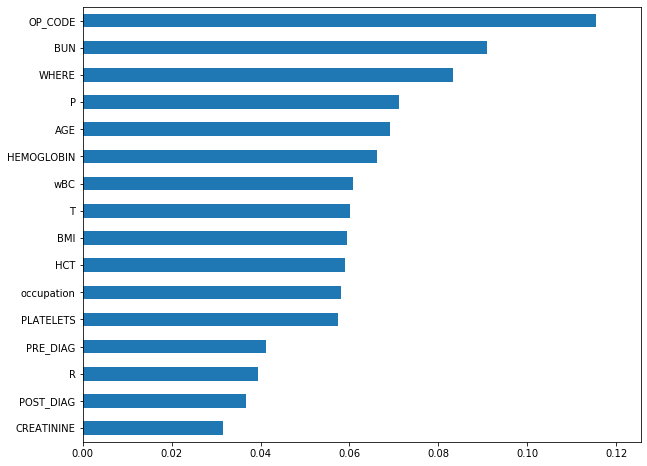

In [17]:
graph_feature_importances( RF_normal_100 , column.columns, summarized_columns = categorical_variables)

In [18]:
RF_normal_100_predict = RF_normal_100.predict(test_feature)

In [19]:
RF_normal_100_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [20]:
pd.crosstab( test_y, RF_normal_100_predict, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,7,3
1,2,4
2,3,0
3,0,1


In [21]:
RF_normal_100.score(test_feature, test_y)

0.55

In [22]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3])

In [23]:
for i in range(10):
    RF_normal_100 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, max_depth = None,
                                           max_features = "auto", oob_score = True ) #, class_weight = class_weight 
    RF_normal_100.fit( train_feature , train_y )
    #graph_feature_importances( RF_normal_100 , column.columns, summarized_columns = categorical_variables)
    RF_normal_100_predict = RF_normal_100.predict(test_feature)
    #pd.crosstab( test_y, RF_normal_100_predict, rownames=['Actual Species'], colnames=['Predicted Species'])
    print(RF_normal_100.score(test_feature, test_y))

0.55
0.55
0.55
0.55
0.5
0.55
0.6
0.55
0.55
0.45


In [24]:
#from keras.models import load_model

In [25]:
RF_normal_100.predict_proba(test_feature)

array([[0.34, 0.44, 0.15, 0.07],
       [0.72, 0.2 , 0.07, 0.01],
       [0.16, 0.61, 0.17, 0.06],
       [0.42, 0.45, 0.09, 0.04],
       [0.36, 0.4 , 0.15, 0.09],
       [0.84, 0.08, 0.04, 0.04],
       [0.61, 0.27, 0.07, 0.05],
       [0.73, 0.15, 0.09, 0.03],
       [0.32, 0.36, 0.24, 0.08],
       [0.46, 0.3 , 0.13, 0.11],
       [0.05, 0.53, 0.4 , 0.02],
       [0.21, 0.6 , 0.14, 0.05],
       [0.51, 0.29, 0.11, 0.09],
       [0.15, 0.49, 0.14, 0.22],
       [0.08, 0.71, 0.08, 0.13],
       [0.4 , 0.24, 0.27, 0.09],
       [0.52, 0.15, 0.26, 0.07],
       [0.54, 0.23, 0.17, 0.06],
       [0.41, 0.38, 0.16, 0.05],
       [0.31, 0.42, 0.17, 0.1 ]])

In [26]:
#import pickle

In [27]:
#pickle.dump(RF_normal_100, open('0427new_train_1_change.csv', 'wb'))

In [28]:
#loaded_model = pickle.load(open('0427new_train_1_change.csv', 'rb'))

In [29]:
#result = loaded_model.score(test_feature, test_y)

In [30]:
#result2 = loaded_model.predict_proba(test_feature)

In [31]:
#result

In [32]:
#result2